<a href="https://colab.research.google.com/github/Kethellem/cursopython/blob/main/teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [153]:
from google.colab import files
uploaded = files.upload()

Saving CREDIT.csv to CREDIT (3).csv


In [154]:
df = pd.read_csv('CREDIT.csv', delimiter=';')
df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


In [155]:
#Verificando tipos de dados
df.dtypes

,0
Age,float64
Gender,object
Income,object
Education,object
Marital Status,object
Number of Children,int64
Home Ownership,object
Credit Score,object


In [156]:
#Tranformando coluna Income de object para float
df['Income'] = df['Income'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['Income'] = df['Income'].astype(float)

In [157]:
#Verificando Transformação
df.dtypes

,0
Age,float64
Gender,object
Income,float64
Education,object
Marital Status,object
Number of Children,int64
Home Ownership,object
Credit Score,object


In [158]:
#True se houver valor nulo no DataFrame e False caso contário
df.isnull().values.any()

np.True_

In [159]:
#Número de valores nulos em cada coluna
df.isnull().sum()

,0
Age,34
Gender,0
Income,0
Education,0
Marital Status,0
Number of Children,0
Home Ownership,0
Credit Score,0


In [160]:
#Porcentagem de dados faltantes
(df.isnull().sum() / len(df)) * 100

,0
Age,20.731707
Gender,0.000000
Income,0.000000
Education,0.000000
Marital Status,0.000000
Number of Children,0.000000
Home Ownership,0.000000
Credit Score,0.000000


In [161]:
df[df['Age'].isnull()]

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
8,NaN,Female,80000.0,Master's Degree,Married,2,Owned,High
9,NaN,Male,105000.0,Doctorate,Single,0,Owned,High
10,NaN,Female,90000.0,High School Diploma,Married,1,Owned,High
11,NaN,Male,135000.0,Bachelor's Degree,Married,0,Owned,High
12,NaN,Female,35000.0,High School Diploma,Single,0,Rented,Low
13,NaN,Male,55000.0,Associate's Degree,Single,0,Rented,Average
14,NaN,Female,70000.0,Bachelor's Degree,Married,2,Owned,High
15,NaN,Male,95000.0,Master's Degree,Single,0,Owned,High
16,NaN,Female,85000.0,Doctorate,Married,1,Owned,High
17,NaN,Male,125000.0,High School Diploma,Married,0,Owned,High


COLUNA AGE

Fazendo o tratamento da coluna **age** com mediana

In [162]:
#Analisando Média
df['Age'].mean()

np.float64(37.50769230769231)

In [163]:
#Analisando Mediana
df['Age'].median()

36.0

In [164]:
#Substituindo os valores faltantes da coluna Age pela mediana
mediana_age = df['Age'].median()
df['Age'].fillna(mediana_age, inplace=True)

In [165]:
df['Age'].isnull().sum()

np.int64(0)

In [166]:
#Verificando se ainda possui dados faltantes na coluna Age
(df.isnull().sum() / len(df)) * 100

,0
Age,0.0
Gender,0.0
Income,0.0
Education,0.0
Marital Status,0.0
Number of Children,0.0
Home Ownership,0.0
Credit Score,0.0


Corrigindo dados incosistentes

In [167]:
# Verificar valores únicos em cada coluna categórica
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    print(f"\nColuna: {col}")
    print(df[col].unique())


Coluna: Gender
['Female' 'Male']

Coluna: Education
["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]

Coluna: Marital Status
['Single' 'Married']

Coluna: Home Ownership
['Rented' 'Owned']

Coluna: Credit Score
['High' 'Average' 'Low']


In [168]:
# Converter todos os valores das colunas categóricas para caixa baixa
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    df[col] = df[col].str.lower()

In [169]:
#Visualizando alterações
df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,female,50000.0,bachelor's degree,single,0,rented,high
1,30.0,male,100000.0,master's degree,married,2,owned,high
2,35.0,female,75000.0,doctorate,married,1,owned,high
3,40.0,male,125000.0,high school diploma,single,0,owned,high
4,45.0,female,100000.0,bachelor's degree,married,3,owned,high
5,50.0,male,150000.0,master's degree,married,0,owned,high
6,26.0,female,40000.0,associate's degree,single,0,rented,average
7,31.0,male,60000.0,bachelor's degree,single,0,rented,average
8,36.0,female,80000.0,master's degree,married,2,owned,high
9,36.0,male,105000.0,doctorate,single,0,owned,high


In [170]:
#Padronizando colunas em português
df.rename(columns={'Age': 'idade'}, inplace=True)
df.rename(columns={'Income: ': 'renda'}, inplace=True)
df.rename(columns={'Education': 'educacao'}, inplace=True)
df.rename(columns={'Gender': 'genero'}, inplace=True)
df.rename(columns={'Number of Children': 'numero de filhos'}, inplace=True)
df.rename(columns={'Marital Status': 'estado civil'}, inplace=True)
df.rename(columns={'Home Ownership': 'propriedade residencial'}, inplace=True)
df.rename(columns={'Credit Score': 'pontuacao de credito'}, inplace=True)
df.head(10)


,idade,genero,Income,educacao,estado civil,numero de filhos,propriedade residencial,pontuacao de credito
0,25.0,female,50000.0,bachelor's degree,single,0,rented,high
1,30.0,male,100000.0,master's degree,married,2,owned,high
2,35.0,female,75000.0,doctorate,married,1,owned,high
3,40.0,male,125000.0,high school diploma,single,0,owned,high
4,45.0,female,100000.0,bachelor's degree,married,3,owned,high
5,50.0,male,150000.0,master's degree,married,0,owned,high
6,26.0,female,40000.0,associate's degree,single,0,rented,average
7,31.0,male,60000.0,bachelor's degree,single,0,rented,average
8,36.0,female,80000.0,master's degree,married,2,owned,high
9,36.0,male,105000.0,doctorate,single,0,owned,high


2 ETAPA

In [171]:
#Utilizand função describe
df['idade'].describe()

,idade
count,164.000000
mean,37.195122
std,7.586619
min,25.000000
25%,31.750000
50%,36.000000
75%,43.000000
max,53.000000


In [172]:
#Plotando Gráfico
fig=px.box(df, y='idade', title='Boxplot Idade')
fig.show()

A distribuição é aproximadamente normal, com concentração entre 25 e 50 anos, o que é típico para perfis analisados em modelos de crédito

---



In [173]:
df['Income'].describe()

,Income
count,164.000000
mean,83765.243902
std,32457.306728
min,25000.000000
25%,57500.000000
50%,83750.000000
75%,105000.000000
max,162500.000000


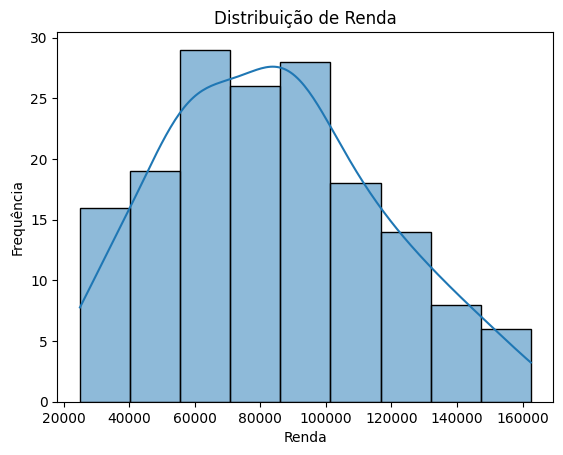

In [241]:
sns.histplot(df['Income'], kde=True)
plt.title('Distribuição de Renda')
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.show()

 Distribuição assimétrica à direita (cauda longa) → indica a presença de poucas pessoas com rendas muito altas. Já tratamos outliers anteriormente.

In [175]:
df['genero'].describe()

,genero
count,164
unique,2
top,female
freq,86


In [176]:
fig = px.histogram(df, x='genero', title='Distribuição por Gênero')
fig.show()

A base está equilibrada entre homens e mulheres.

In [177]:
# Descrição da coluna educação
df['educacao'].describe()

,educacao
count,164
unique,5
top,bachelor's degree
freq,42


In [178]:
# Histograma e boxplot da coluna educação
fig = px.histogram(df, x='educacao', title='Distribuição por Nível de Educação')
fig.show()

 A maior parte da amostra tem Bachelor’s ou Master’s Degree. Pode ter impacto na renda ou score.


In [179]:
df['estado civil'].describe()

,estado civil
count,164
unique,2
top,married
freq,87


In [180]:
fig = px.histogram(df, x='estado civil', title='Distribuição por Estado Civil')
fig.show()


Predomínio de pessoas casadas, o que pode influenciar padrão de consumo e crédito.


In [181]:
df['propriedade residencial'].describe()

,propriedade residencial
count,164
unique,2
top,owned
freq,111


In [182]:
fig = px.histogram(df, x='propriedade residencial', title='Distribuição por Propriedade Residencial')
fig.show()


Alta concentração de pessoas que possuem imóvel próprio — característica associada a perfis de maior score.

In [183]:
df['numero de filhos'].describe()

,numero de filhos
count,164.000000
mean,0.652439
std,0.883346
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,3.000000


In [184]:
fig = px.box(df, y='numero de filhos', title='Boxplot Número de Filhos')
fig.show()

A maioria não tem filhos, com leve concentração em quem tem 1 ou 2.

In [185]:
df['pontuacao de credito'].describe()

,pontuacao de credito
count,164
unique,3
top,high
freq,113


In [186]:
fig = px.box(df, y='pontuacao de credito', title='Boxplot Pontuação de Crédito')
fig.show()


A distribuição está desbalanceada — maioria com score “High”. Isso pode exigir balanceamento antes da modelagem

TRATAMENTO DE OUTLIERS

In [187]:
#Função para detectar outliers usando IQR
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)
iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

In [188]:
df = df[(df['Income'] >= limite_inferior) & (df['Income'] <= limite_superior)]


In [189]:
fig = px.box(df, y='Income', title='Boxplot Income')
fig.show()


ANALISE BIVARIADA

exite relação entre idade e estado civil ?

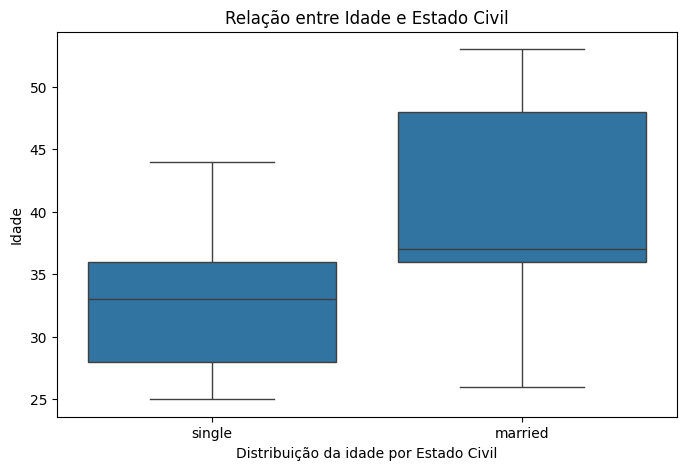

In [190]:
plt.figure(figsize=(8,5))
sns.boxplot(x='estado civil', y='idade', data=df)
plt.title('Relação entre Idade e Estado Civil')
plt.xlabel('Distribuição da idade por Estado Civil')
plt.ylabel('Idade')
plt.show()

- Indivíduos casados tendem a ser mais velhos, com idade média visivelmente acima da dos solteiros.
- Solteiros concentram-se em faixas etárias mais jovens — algo esperado socialmente, mas importante de observar em modelos que usam idade e perfil familiar.


 Qual a relação entre Credit Score e nível de escolaridade?


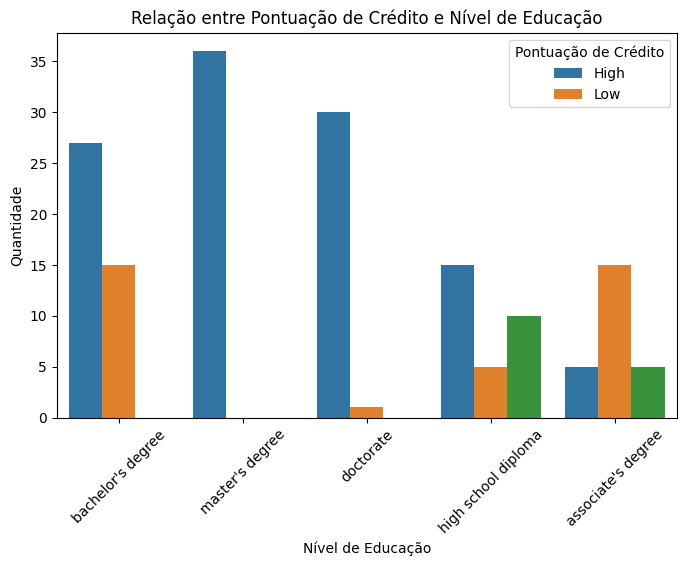

In [191]:
plt.figure(figsize=(8,5))
sns.countplot(x='educacao', hue='pontuacao de credito', data=df)
plt.title('Relação entre Pontuação de Crédito e Nível de Educação')
plt.xlabel('Nível de Educação')
plt.xticks(rotation=45)
plt.ylabel('Quantidade')
plt.legend(title='Pontuação de Crédito', labels=['High', 'Low'])

plt.show()

- Pessoas com níveis educacionais mais elevados (Master’s e Doctorate) tendem a ter maior proporção de “High” credit score.
- Já perfis com apenas ensino médio ou técnico aparecem com mais frequência nos scores “Average” e “Low”.
- Isso indica uma possível correlação positiva entre escolaridade e score — o que pode refletir fatores como renda, estabilidade e acesso a crédito


Salario influencia na idade ?

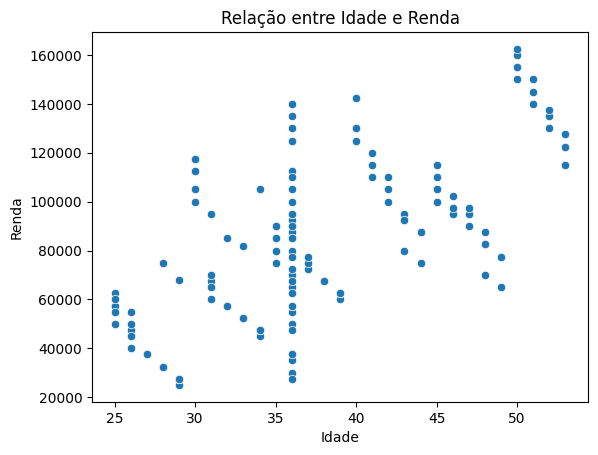

In [192]:
sns.scatterplot(x='idade', y='Income', data=df)
plt.title('Relação entre Idade e Renda')
plt.xlabel('Idade')
plt.ylabel('Renda')
plt.show()


- Existe uma tendência leve de aumento da renda com a idade, especialmente até os 40–45 anos.
- Após esse ponto, a renda parece estabilizar ou até cair levemente.
- Isso faz sentido: pessoas mais velhas geralmente têm mais experiência e ocupam cargos mais altos, mas também há aposentadorias ou transições de carreira.


Salario influencia na pontuação de crédito

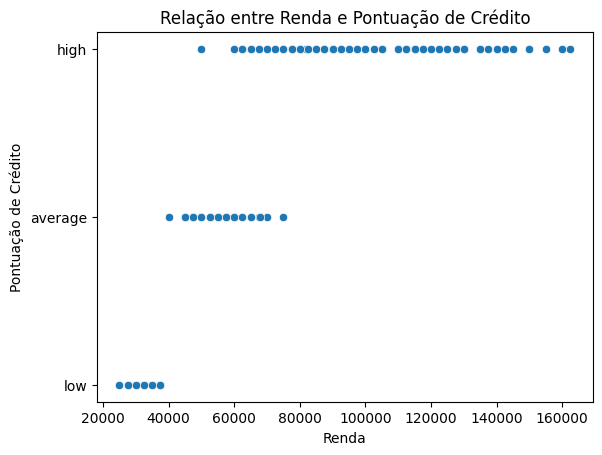

In [193]:
sns.scatterplot(x='Income', y='pontuacao de credito', data=df)
plt.title('Relação entre Renda e Pontuação de Crédito')
plt.xlabel('Renda')
plt.ylabel('Pontuação de Crédito')
plt.show()

- Pessoas com score “High” têm, em média, rendas mais altas do que aquelas com score “Average” ou “Low”.
- Isso sugere uma correlação positiva entre renda e score de crédito — o que é esperado, já que maior renda tende a significar menor risco de inadimplência.

clientes com casa própria tendem a ter um score mais alto?


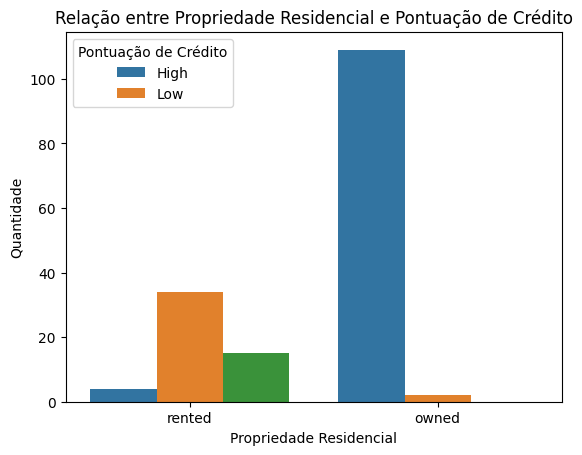

In [194]:
sns.countplot(x='propriedade residencial', hue='pontuacao de credito', data=df)
plt.title('Relação entre Propriedade Residencial e Pontuação de Crédito')
plt.xlabel('Propriedade Residencial')
plt.ylabel('Quantidade')
plt.legend(title='Pontuação de Crédito', labels=['High', 'Low'])
plt.show()


- A maioria dos clientes com casa própria (Owned) apresenta score “High”.
- Já entre os que moram de aluguel (Rented), há maior proporção de scores “Average” e “Low”.
- Isso sugere que ter imóvel próprio está associado a maior estabilidade financeira, o que contribui para um score mais alto.



Qual a distribuição de idade por genero?

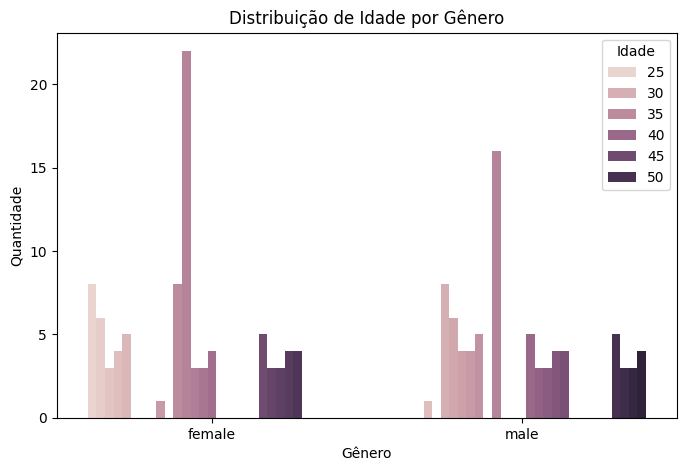

In [195]:
plt.figure(figsize=(8,5))
sns.countplot(x='genero', hue='idade', data=df)
plt.title('Distribuição de Idade por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.legend(title='Idade', loc='upper right')

Pessoas com nível superior têm maior renda, independentemente do estado civil?

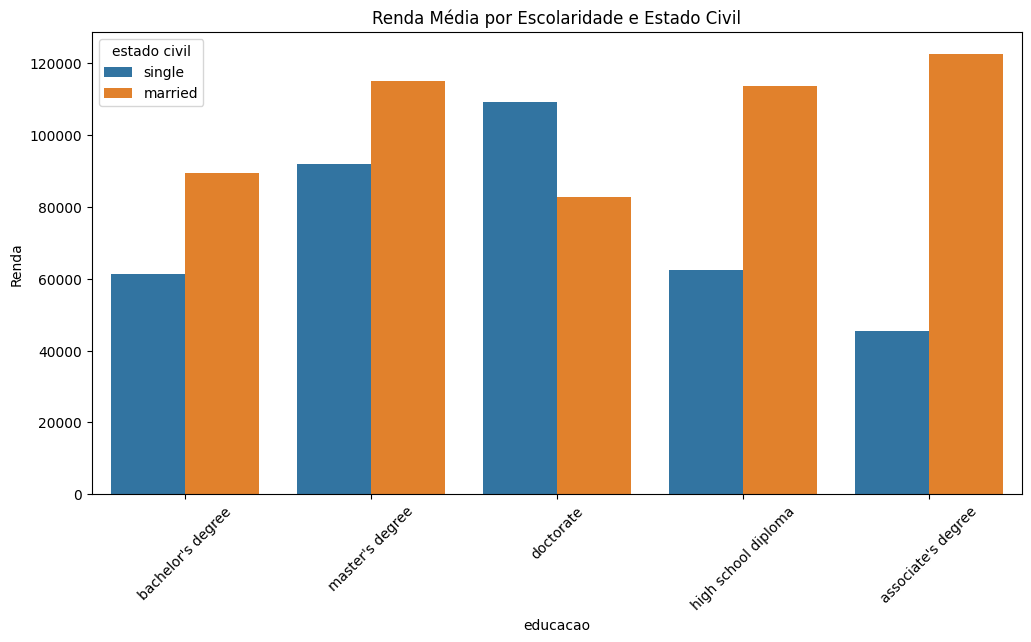

In [196]:
plt.figure(figsize=(12,6))
sns.barplot(x='educacao', y='Income', hue='estado civil', data=df, ci=None)
plt.title('Renda Média por Escolaridade e Estado Civil')
plt.xticks(rotation=45)
plt.ylabel('Renda')
plt.show()


- Pessoas com maior escolaridade — especialmente quem possui Mestrado (Master's) ou Doutorado (Doctorate) — tendem a ter renda significativamente mais alta do que quem possui ensino médio ou técnico, seja solteiro ou casado.
- Embora casados geralmente ganhem um pouco mais, a diferença causada pela escolaridade é mais marcante que a causada pelo estado civil.
- Ou seja: ter um diploma universitário tem mais impacto na renda do que ser casado(a).


ANÁLISE DE CORRELAÇÃO

In [197]:
import numpy as np
import sklearn

In [198]:
df.head(10)

,idade,genero,Income,educacao,estado civil,numero de filhos,propriedade residencial,pontuacao de credito
0,25.0,female,50000.0,bachelor's degree,single,0,rented,high
1,30.0,male,100000.0,master's degree,married,2,owned,high
2,35.0,female,75000.0,doctorate,married,1,owned,high
3,40.0,male,125000.0,high school diploma,single,0,owned,high
4,45.0,female,100000.0,bachelor's degree,married,3,owned,high
5,50.0,male,150000.0,master's degree,married,0,owned,high
6,26.0,female,40000.0,associate's degree,single,0,rented,average
7,31.0,male,60000.0,bachelor's degree,single,0,rented,average
8,36.0,female,80000.0,master's degree,married,2,owned,high
9,36.0,male,105000.0,doctorate,single,0,owned,high


In [199]:
#Matriz de correlaçãp
df.select_dtypes(include=['number']).corr()

,idade,Income,numero de filhos
idade,1.000000,0.621492,0.072432
Income,0.621492,1.000000,0.084547
numero de filhos,0.072432,0.084547,1.000000


Text(0.5, 1.0, 'Matriz de Correlação')

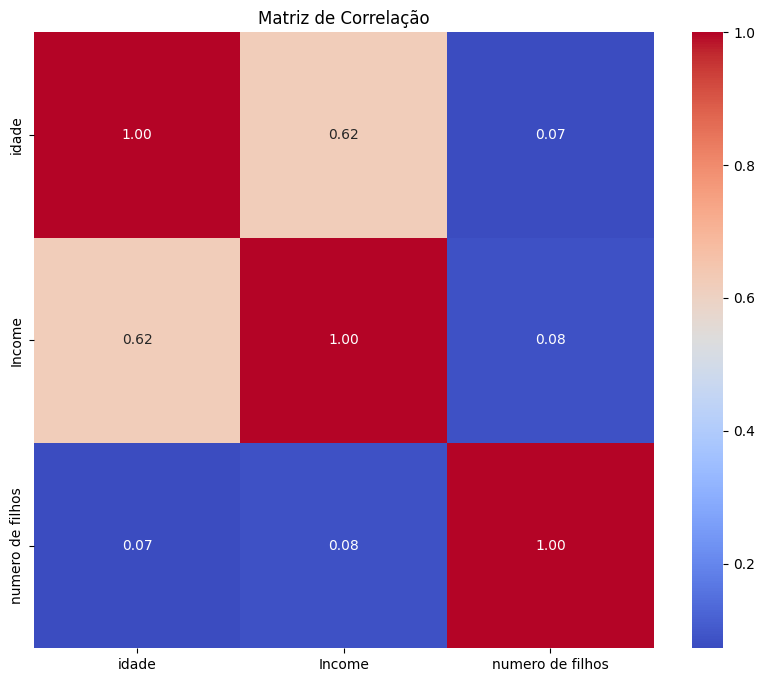

In [203]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size":10})
plt.title('Matriz de Correlação')

**Idade X Renda**: correlação moderada. Pessoas mais velhas tendem a ter rendas maiores.

**Idade X Número de filhos**: correlação fraca. Idade não parece influenciar fortemente a n° de filhos

**Renda X Número de filhos**: correlação fraca. Renda não tem correlação significativa com filhos


In [215]:
#Importando label Enconding
from sklearn.preprocessing import LabelEncoder
#Criando uma instânia do Label Enconding
LabelEncoder = LabelEncoder()
#Aplicando Label Encondig par colunas categoricas
df['genero'] = LabelEncoder.fit_transform(df['genero'])
df['estado civil'] = LabelEncoder.fit_transform(df['estado civil'])
df['propriedade residencial'] = LabelEncoder.fit_transform(df['propriedade residencial'])
df['pontuacao de credito'] = LabelEncoder.fit_transform(df['pontuacao de credito'])


In [216]:
print(df)

     idade  genero    Income  educacao  estado civil  numero de filhos  \
0     25.0       0   50000.0         1             1                 0   
1     30.0       1  100000.0         4             0                 2   
2     35.0       0   75000.0         2             0                 1   
3     40.0       1  125000.0         3             1                 0   
4     45.0       0  100000.0         1             0                 3   
..     ...     ...       ...       ...           ...               ...   
159   29.0       0   27500.0         3             1                 0   
160   34.0       1   47500.0         0             1                 0   
161   39.0       0   62500.0         1             0                 2   
162   44.0       1   87500.0         4             1                 0   
163   49.0       0   77500.0         2             0                 1   

     propriedade residencial  pontuacao de credito  
0                          1                     1  
1    

In [217]:
# Remove essas colunas do DataFrame
df = df.drop(columns=['genero'])
df = df.drop(columns=['estado civil'])
df = df.drop(columns=['propriedade residencial'])



In [218]:
df.select_dtypes(include=['number']).corr()

,idade,Income,educacao,numero de filhos,pontuacao de credito
idade,1.000000,0.621492,0.171525,0.072432,0.218494
Income,0.621492,1.000000,0.369449,0.084547,0.083698
educacao,0.171525,0.369449,1.000000,0.047311,0.334424
numero de filhos,0.072432,0.084547,0.047311,1.000000,0.136517
pontuacao de credito,0.218494,0.083698,0.334424,0.136517,1.000000


Text(0.5, 1.0, 'Matriz de Correlação com variaveis codificada')

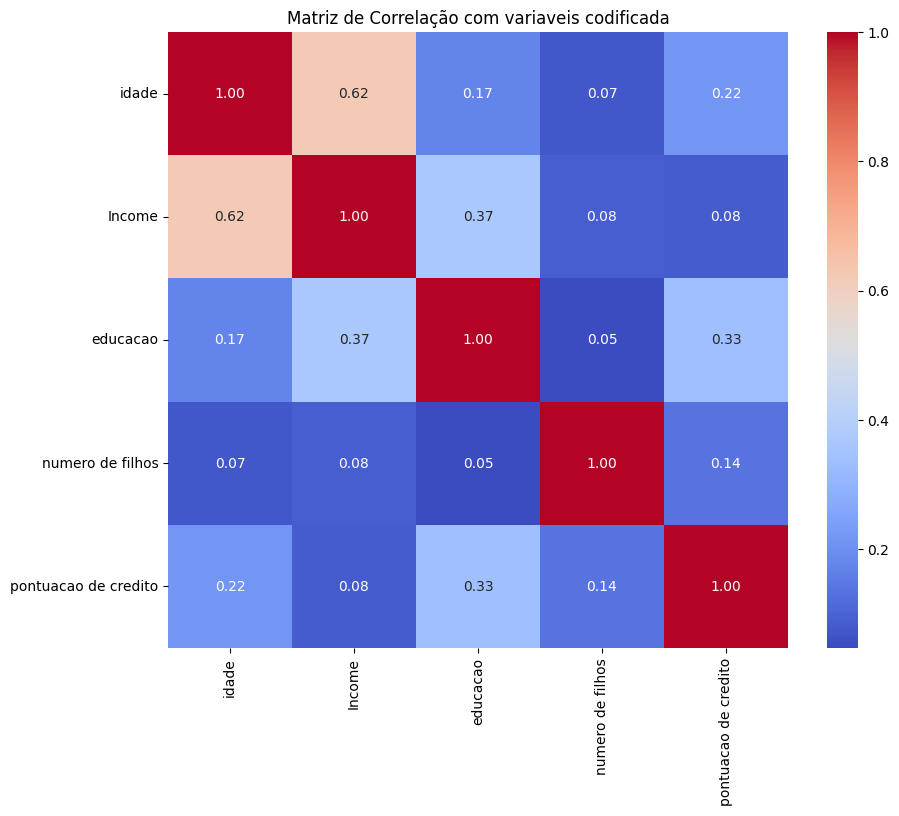

In [221]:
#Plotando novamente a correlação de variaveis categoricas
correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size":10})
plt.title('Matriz de Correlação com variaveis codificada')

Novas correlações relevantes

**Educação X Renda**:Nível educacional mais alto favorece melhores salários.

**Educação X Pontuação de Crédito**:Escolaridade mais alta está associada a score mais elevado.

**Idade X Pontuação de Crédito**: Perfil etário mais maduro contribui parcialmente para melhor score.

SEPARAÇÃO DE BASE E TESTE

In [222]:
#Separar os dados em features(x) e o alvo (y)
X = df.drop('pontuacao de credito', axis=1)
y = df['pontuacao de credito']

In [223]:
from sklearn.model_selection import train_test_split

In [224]:
#Separar os dados em conjuntos de trieno e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [229]:
print("Tamanho de X_train:", X_train.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de X_test:", X_test.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de X_train: (131, 4)
Tamanho de y_train: (131,)
Tamanho de X_test: (33, 4)
Tamanho de y_test: (33,)


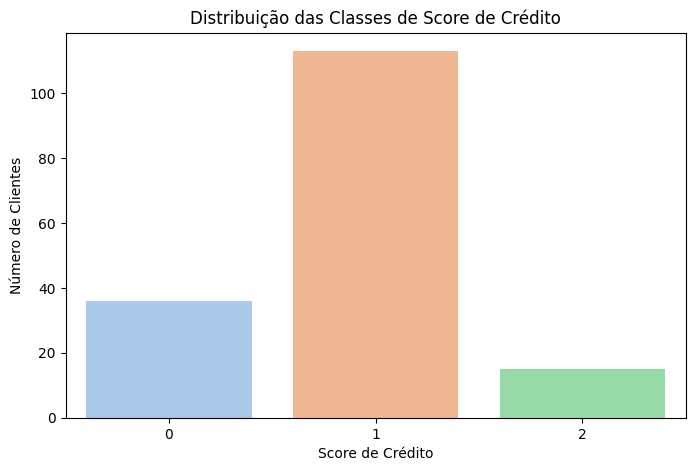

In [231]:
#Verificando de Pontuação de Crédito esta balanceada
plt.figure(figsize=(8,5))
sns.countplot(x='pontuacao de credito', data=df, palette='pastel')
plt.title('Distribuição das Classes de Score de Crédito')
plt.xlabel('Score de Crédito')
plt.ylabel('Número de Clientes')
plt.show()


A variável Credit Score apresenta desbalanceamento: a maioria dos clientes está na classe média, enquanto as classes baixa e alta são bem menores em quantidade. Isso pode comprometer a capacidade do modelo de prever corretamente os grupos menos representados, gerando viés para a classe dominante.


BALANCEAMENTO


In [240]:
from imblearn.over_sampling import SMOTE

# Instancia o SMOTE
smote = SMOTE(random_state=42)

# Aplica na base de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

#Verificar a classificação da classe após o balanceamento
print("Classes após o balanceamento:")
print(y_resampled.value_counts())

Classes após o balanceamento:
pontuacao de credito
1    90
0    90
2    90
Name: count, dtype: int64
